In [4]:
from wfield import *
    
# This will create a landmarks file and a mask in the "session_folder" folder
template_folder = '/home/data/JC111/20230628_171517/wfield/'
session_folder = '/home/data/JC111/20230520_164209/wfield/'

transform, nlmarks, nmask = prepare_multisession_match_files(session_folder, template_folder)


In [5]:
from wfield import *

template_folder = '/home/data/JC111/20230628_171517/wfield/'
session_folder = '/home/data/JC111/20230520_164209/wfield/'

template_average_path = glob(pjoin(template_folder,'frames_average.npy'))

template = None
mask = None
lmarks = None

if len(template_average_path):
    template_nt = np.load(template_average_path[0])[0].squeeze()
    # transform if possible:
    lmarkfile = glob(pjoin(template_folder,'*landmarks.json'))
    if len(lmarkfile):
        lmarks = load_allen_landmarks(lmarkfile[0])
        template = im_apply_transform(template_nt,lmarks['transform']).astype('uint16')
    maskfile = glob(pjoin(template_folder,'mask.npy'))
    if len(maskfile):
        mask_nt = np.load(maskfile[0])
        if not lmarks is None:
            mask = (im_apply_transform(mask_nt, lmarks['transform'])>0).astype('uint8')

# load the mask
frames_path = glob(pjoin(session_folder,'frames_average.npy'))
if len(frames_path):
    frames = np.load(frames_path[0])[0].squeeze()

# this is the function that does the matching
transform, nlmarks, nmask = match_sessions(template_avg = template, 
                                            avg = frames,
                                            lmarks = lmarks,
                                            template_mask = mask)

# this saves to the folder
# save_allen_landmarks(filename = pjoin(session_folder, os.path.basename(lmarkfile[0])), **nlmarks) 
# np.save(pjoin(session_folder,'mask.npy'), nmask.astype(bool))


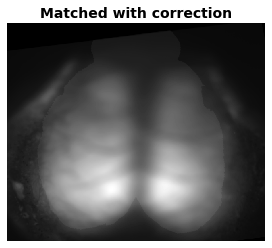

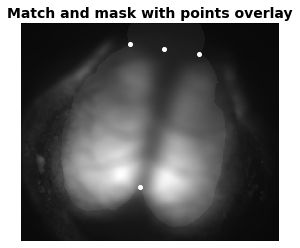

In [6]:
# plot the mask and for the newly matched session
import pylab as plt
plt.figure()
plt.imshow(im_apply_transform(frames,transform), cmap='gray')
plt.imshow(im_apply_transform(nmask,transform), cmap='gray', alpha = 0.05)
plt.axis('off');
plt.title('Matched with correction')
plt.figure()
plt.imshow(frames, cmap='gray')
plt.imshow(nmask, cmap='gray',alpha = 0.05)
plt.plot(nlmarks['landmarks_match'].x, nlmarks['landmarks_match'].y, 'wo')
plt.title('Match and mask with points overlay')
plt.axis('off');


In [ ]:
plt.figure()
plt.imshow(template_nt, cmap='gray')
plt.imshow(mask_nt, cmap='gray',alpha = 0.3)
plt.plot(lmarks['landmarks_match'].x, lmarks['landmarks_match'].y, 'wo')
plt.axis('off')
plt.title('template and mask before transform');

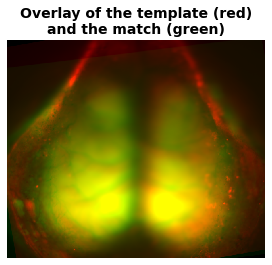

In [7]:
scale = lambda x: np.clip(x/np.percentile(x,98),0,1)
plt.imshow(np.stack([scale(template),
                     scale(im_apply_transform(frames,transform)),
                     template*0]).transpose([1,2,0]))
plt.axis('off');
plt.title('Overlay of the template (red)\nand the match (green)');